In [229]:
from Framework import Confounder_Injection as CI
from Framework import Models
import importlib
importlib.reload(Models)
importlib.reload(CI)
import torch

# Experiments

modes:
1. br_net
2. black_n_white

model:
1. NeuralNetwork(inputsize)
2. LeNet_5
3. Br_Net

### NeuralNetwork

With the test_network class it's easy to test new combinations parameters

Training took  0.2850635051727295 s


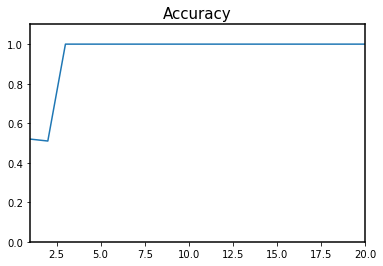

With mean accuracy= 0.9514705882352942


In [230]:
model = Models.NeuralNetwork(32*32)
c = CI.confounder(model=model)
c.generate_data(mode="black_n_white", samples=64)
acc, loss = c.train(epochs=20, batch_size=8, optimizer=torch.optim.SGD(model.parameters(), lr=0.003, momentum=0.9))
p = CI.plot()
p.acc_loss(acc, loss)

t_SNE shape:  (128, 2)


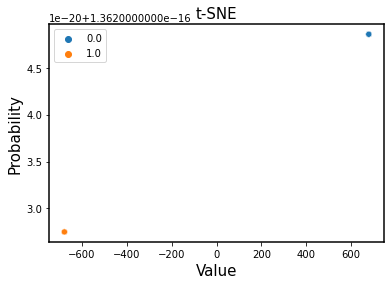

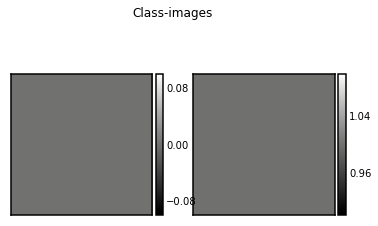

In [231]:
p = CI.plot()
p.tsne(c.x, c.y, 2)
p.class_images(c.x)

### ConvNet

Training took  0.3769705295562744 s


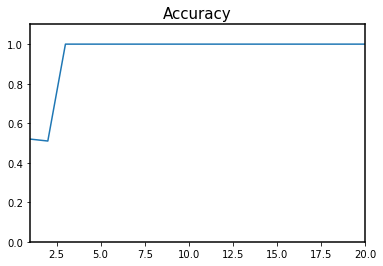

With mean accuracy= 0.9514705882352942


In [232]:
model = Models.LeNet_5()
c = CI.confounder(model=model)
c.generate_data(mode="black_n_white", samples=64)
acc, loss = c.train(epochs=20, batch_size=8, optimizer=torch.optim.SGD(model.parameters(), lr=0.003, momentum=0.9))
p = CI.plot()
p.acc_loss(acc, loss)

t_SNE shape:  (128, 2)


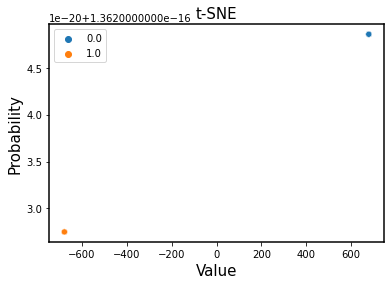

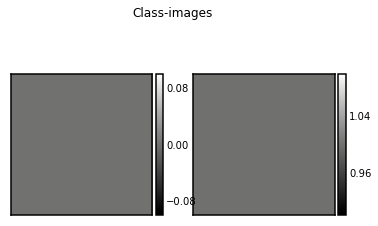

In [233]:
p = CI.plot()
p.tsne(c.x, c.y, 2)
p.class_images(c.x)

### Br_Net

Training took  0.32762742042541504 s


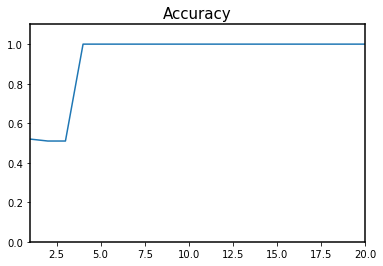

With mean accuracy= 0.9269607843137255


In [234]:
model = Models.Br_Net()
c = CI.confounder(model=model)
c.generate_data(mode="black_n_white", samples=64)
acc, loss = c.train(epochs=20, batch_size=8, optimizer=torch.optim.SGD(model.parameters(), lr=0.003, momentum=0.9))
p = CI.plot()
p.acc_loss(acc, loss)

t_SNE shape:  (128, 2)


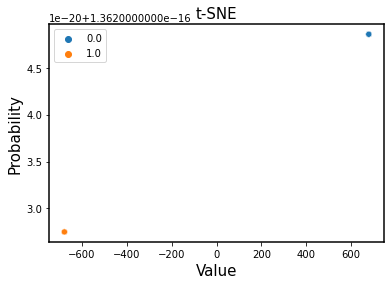

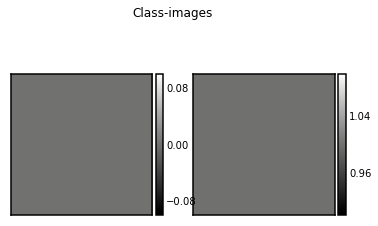

In [235]:
p = CI.plot()
p.tsne(c.x, c.y, 2)
p.class_images(c.x)

In [236]:
#c = create_dataloader(x,y,0.8,1)
#data = c.get_dataloader()
#for img, label in data[0]:
#    print(img)
#    print(label)